In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [186]:
key_path = './service_account/gentle-keyword-423715-j0-03be08ad6412.json'

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

In [187]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id
)

In [188]:
# Try if this connected

query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 5
"""

df = client.query(query).to_dataframe()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   visitorId             0 non-null      Int64 
 1   visitNumber           5 non-null      Int64 
 2   visitId               5 non-null      Int64 
 3   visitStartTime        5 non-null      Int64 
 4   date                  5 non-null      object
 5   totals                5 non-null      object
 6   trafficSource         5 non-null      object
 7   device                5 non-null      object
 8   geoNetwork            5 non-null      object
 9   customDimensions      5 non-null      object
 10  hits                  5 non-null      object
 11  fullVisitorId         5 non-null      object
 12  userId                0 non-null      object
 13  channelGrouping       5 non-null      object
 14  socialEngagementType  5 non-null      object
dtypes: Int64(4), object(11)
memory usage: 752.0+

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [189]:
# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

In [190]:
# Get format schema nested field

def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info


table_ref = dataset_ref.table('ga_sessions_20160801')
table = client.get_table(table_ref)

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [191]:
anomaly = pd.read_csv("./result/anomaly_products.csv")['product'].values
tuple(anomaly)

('Google Sunglasses',
 'Leatherette Journal',
 'Windup Android',
 'Red Shine 15 oz Mug',
 'Electronics Accessory Pouch',
 'YouTube Custom Decals',
 "Google Women's Short Sleeve Hero Tee White",
 'Google Laptop Backpack',
 'Maze Pen',
 'Google Water Resistant Bluetooth Speaker',
 'Recycled Mouse Pad',
 'YouTube Twill Cap',
 "Google Men's Short Sleeve Badge Tee Charcoal",
 'Google Twill Cap',
 "Google Men's  Zip Hoodie",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
 "Google Women's Fleece Hoodie",
 "YouTube Men's Short Sleeve Hero Tee Black",
 'Google 22 oz Water Bottle',
 'Google Laptop and Cell Phone Stickers',
 'Badge Holder',
 "Google Women's Performance Polo Grey/Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 'Google Rucksack',
 'Google Alpine Style Backpack',
 'Engraved Ceramic Google Mug',
 "Google Men's Vintage Badge Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 'Google Kick Ball',
 "Google Men's 100% Cotton Short Sleeve Hero Te

In [192]:
query = f"""
SELECT 
  products.v2ProductName as product,
  SUM(totals.visits) as total_visits,
  SUM(totals.newVisits) as total_first_visits,
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
    UNNEST(h.hits) hits,
    UNNEST(hits.product) products
WHERE 
  (_TABLE_SUFFIX BETWEEN '20170601' AND '20170801')
  AND
    (
      hits.eCommerceAction.action_type != '0'
      AND
      hits.eCommerceAction.action_type != '3'
      AND
      hits.eCommerceAction.action_type != '4'
    )
  AND
  (geoNetwork.country = 'United States')
  AND
  products.v2ProductName IN {tuple(anomaly)}
GROUP BY product
ORDER BY total_first_visits, total_visits DESC
"""

df = client.query(query).to_dataframe()
print(df.info())
df.sort_values(by='total_first_visits', ascending=False).reset_index(drop=True).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product             41 non-null     object
 1   total_visits        41 non-null     Int64 
 2   total_first_visits  41 non-null     Int64 
dtypes: Int64(2), object(1)
memory usage: 1.2+ KB
None


,product,total_visits,total_first_visits
0,Google Men's 100% Cotton Short Sleeve Hero Tee...,3476,1847
1,Google Sunglasses,3873,1799
2,Google Rucksack,2474,1421
3,Google Laptop Backpack,2041,1315
4,Waterproof Backpack,2185,1245
5,YouTube Twill Cap,1780,1169
6,Google Men's Vintage Badge Tee Black,2605,1151
7,Google Alpine Style Backpack,1881,1073
8,YouTube Custom Decals,1532,1004
9,Google Laptop and Cell Phone Stickers,1715,951


In [193]:
anomaly = df.sort_values(by='total_first_visits', ascending=False).head(10)['product'].values
tuple(anomaly)

("Google Men's 100% Cotton Short Sleeve Hero Tee White",
 'Google Sunglasses',
 'Google Rucksack',
 'Google Laptop Backpack',
 'Waterproof Backpack',
 'YouTube Twill Cap',
 "Google Men's Vintage Badge Tee Black",
 'Google Alpine Style Backpack',
 'YouTube Custom Decals',
 'Google Laptop and Cell Phone Stickers')

In [194]:
# query = """
# SELECT 
#   products.v2ProductName as product,
#   date,
#   SUM(totals.visits) as total_visits,
#   SUM(totals.transactions) as total_transactions
# FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
#     UNNEST(h.hits) hits,
#     UNNEST(hits.product) products
# WHERE 
#   (_TABLE_SUFFIX BETWEEN '20160801' AND '20170801')
#   AND
#     (
#       hits.eCommerceAction.action_type != '0'
#       AND
#       hits.eCommerceAction.action_type != '3'
#       AND
#       hits.eCommerceAction.action_type != '4'
#     )
#   AND
#   (geoNetwork.country = 'United States')
#   AND
#   products.v2ProductName IN (
#         'Google Sunglasses', 
#         'Leatherette Journal', 
#         'Windup Android',
#         'Red Shine 15 oz Mug', 
#         'Electronics Accessory Pouch',
#         'YouTube Custom Decals',
#         "Google Women's Short Sleeve Hero Tee White",
#         'Google Laptop Backpack', 
#         'Maze Pen',
#         'Google Water Resistant Bluetooth Speaker', 
#         'Recycled Mouse Pad',
#         'YouTube Twill Cap',
#         "Google Men's Short Sleeve Badge Tee Charcoal", 
#         'Google Twill Cap',
#         "Google Men's  Zip Hoodie",
#         "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
#         "Google Women's Fleece Hoodie",
#         "YouTube Men's Short Sleeve Hero Tee Black",
#         'Google 22 oz Water Bottle',
#         'Google Laptop and Cell Phone Stickers', 
#         'Badge Holder',
#         "Google Women's Performance Polo Grey/Black",
#         "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
#         'Google Rucksack', 
#         'Google Alpine Style Backpack',
#         'Engraved Ceramic Google Mug',
#         "Google Men's Vintage Badge Tee Black",
#         "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
#         'Google Kick Ball',
#         "Google Men's 100% Cotton Short Sleeve Hero Tee White",
#         'Waterproof Backpack', 
#         'Gift Card - $25.00',
#         '26 oz Double Wall Insulated Bottle',
#         "Google Men's Watershed Full Zip Hoodie Grey",
#         'YouTube Leatherette Notebook Combo', 
#         'Sport Bag',
#         'Google Metallic Notebook Set', 
#         'Keyboard DOT Sticker',
#         'Micro Wireless Earbud', 
#         'Recycled Paper Journal Set',
#         'Android BTTF Cosmos Graphic Tee',
#         'Google Vintage Henley Grey/Black', 
#         'BLM Sweatshirt'
#     )
# GROUP BY product, date
# ORDER BY date 
# """

In [195]:
query = f"""
SELECT 
  products.v2ProductName as product,
  date,
  SUM(totals.visits) as total_visits,
  SUM(totals.transactions) as total_transactions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
    UNNEST(h.hits) hits,
    UNNEST(hits.product) products
WHERE 
  (_TABLE_SUFFIX BETWEEN '20160801' AND '20170801')
  AND
    (
      hits.eCommerceAction.action_type != '0'
      AND
      hits.eCommerceAction.action_type != '3'
      AND
      hits.eCommerceAction.action_type != '4'
    )
  AND
  (geoNetwork.country = 'United States')
  AND
  products.v2ProductName IN {tuple(anomaly)}
GROUP BY product, date
ORDER BY date 
"""

df = client.query(query).to_dataframe()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product             3481 non-null   object
 1   date                3481 non-null   object
 2   total_visits        3481 non-null   Int64 
 3   total_transactions  2057 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 115.7+ KB
None


,product,date,total_visits,total_transactions
0,Google Sunglasses,20160801,213,106
1,Google Men's Vintage Badge Tee Black,20160801,17,<NA>
2,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160801,93,33
3,Google Laptop and Cell Phone Stickers,20160802,46,<NA>
4,Google Men's 100% Cotton Short Sleeve Hero Tee...,20160802,91,2


In [196]:
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df['total_visits'] = df['total_visits'].astype('float')
df['total_transactions'] = df['total_transactions'].astype('float') 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product             3481 non-null   object        
 1   date                3481 non-null   datetime64[ns]
 2   total_visits        3481 non-null   float64       
 3   total_transactions  3481 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 108.9+ KB
None


,product,date,total_visits,total_transactions
0,Google Sunglasses,2016-08-01,213.0,106.0
1,Google Men's Vintage Badge Tee Black,2016-08-01,17.0,0.0
2,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-01,93.0,33.0
3,Google Laptop and Cell Phone Stickers,2016-08-02,46.0,0.0
4,Google Men's 100% Cotton Short Sleeve Hero Tee...,2016-08-02,91.0,2.0


In [197]:
products = df['product'].unique()

products

array(['Google Sunglasses', "Google Men's Vintage Badge Tee Black",
       "Google Men's 100% Cotton Short Sleeve Hero Tee White",
       'Google Laptop and Cell Phone Stickers', 'YouTube Custom Decals',
       'YouTube Twill Cap', 'Google Alpine Style Backpack',
       'Waterproof Backpack', 'Google Laptop Backpack', 'Google Rucksack'],
      dtype=object)

In [198]:
# Trial product Google Sunglasses
df_sunglasses = df[df['product'] == 'Google Sunglasses']
df_sunglasses.head()

,product,date,total_visits,total_transactions
0,Google Sunglasses,2016-08-01,213.0,106.0
5,Google Sunglasses,2016-08-02,148.0,87.0
10,Google Sunglasses,2016-08-03,67.0,0.0
16,Google Sunglasses,2016-08-04,87.0,4.0
18,Google Sunglasses,2016-08-05,280.0,80.0


In [199]:
series = df_sunglasses.set_index('date')['total_visits']
series

date
2016-08-01    213.0
2016-08-02    148.0
2016-08-03     67.0
2016-08-04     87.0
2016-08-05    280.0
              ...  
2017-07-28     98.0
2017-07-29     32.0
2017-07-30     53.0
2017-07-31     87.0
2017-08-01    122.0
Name: total_visits, Length: 349, dtype: float64

In [200]:
# split dataset
n_val = int(len(series) * 0.1)
train, test = series.iloc[:len(series)-n_val], series.iloc[len(series)-n_val:]
print('Number of dataset:{}'.format(len(train)))
print('Number of test: {}'.format(len(test)))

Number of dataset:315
Number of test: 34


In [201]:
# train, validation = dataset.iloc[:int(0.7 * len(train))], dataset.iloc[int(0.7 * len(dataset)):]
# print('Number of train:{}'.format(len(train)))
# print('Number of validation: {}'.format(len(validation)))

In [202]:
# EDA
train.describe()

count    315.000000
mean      55.019048
std       42.077192
min        2.000000
25%       27.000000
50%       46.000000
75%       74.000000
max      280.000000
Name: total_visits, dtype: float64

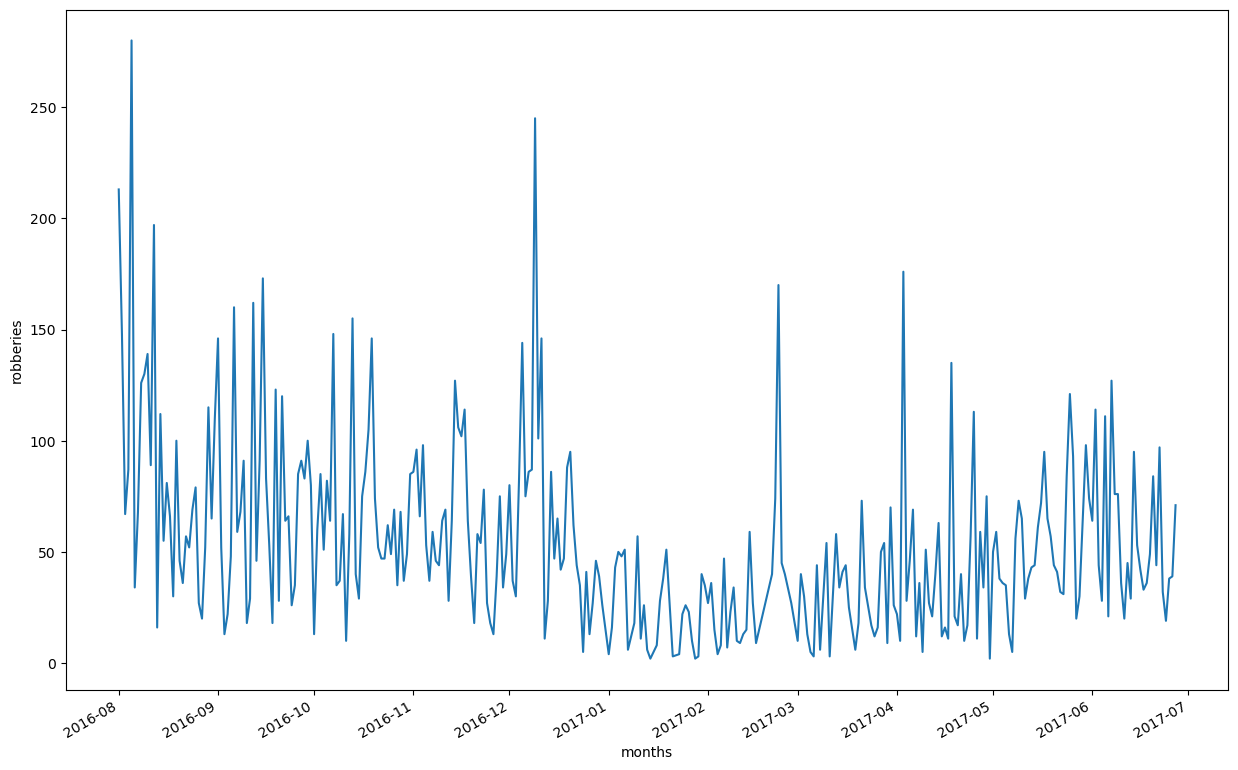

In [203]:
# Data Analysis (line plot)
plt.figure(figsize=(15,10))
train.plot()
plt.ylabel('robberies')
plt.xlabel('months')
plt.show()

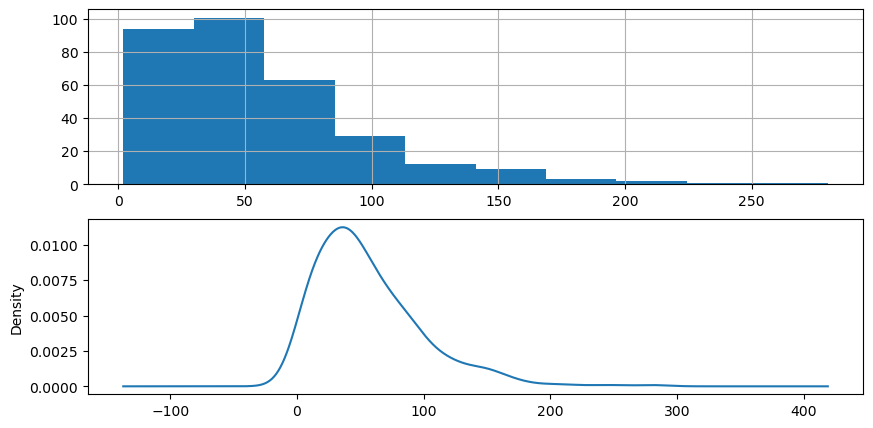

In [204]:
#density plot
plt.figure(figsize=(10,5))
plt.subplot(211)
train.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [205]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

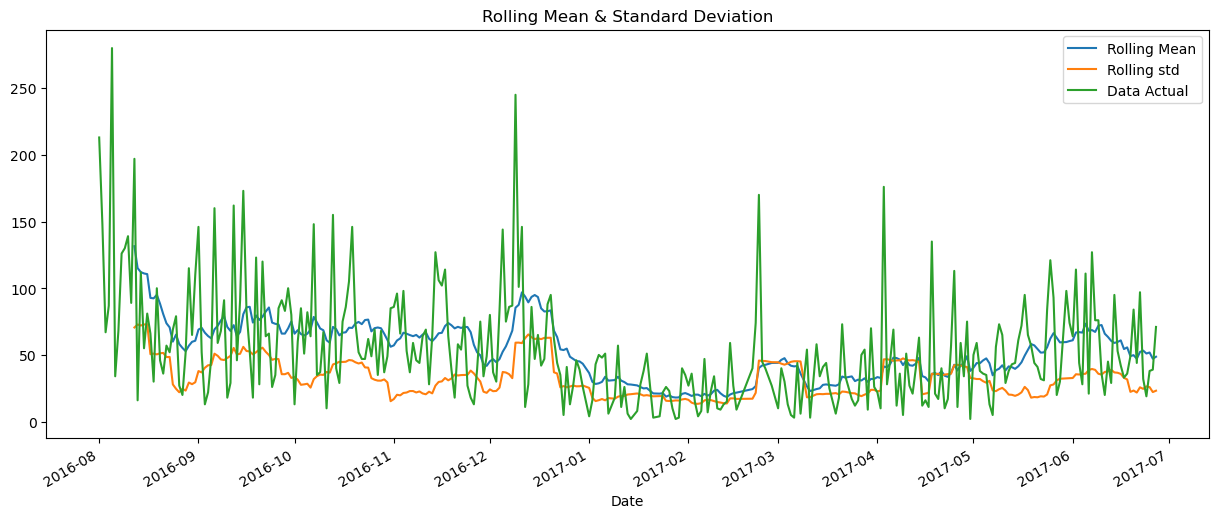

####################################################################################################
ADF Statistic: -3.718847
p-value: 0.003856
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
ADF < Critival Values
Reject null hypothesis, time series is stationary


In [206]:
def adfuller_test(y):
    # Plotting rolling statistics
    fig, ax = plt.subplots(figsize=(15, 6))
    y.rolling(12).mean().plot(ax=ax, label='Rolling Mean')
    y.rolling(12).std().plot(ax=ax, label='Rolling std')
    y.plot(ax=ax, label='Data Actual')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();
    
    print('#'*100)
    # Aduller test
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]['5%']:
        print('ADF > Critical Values')
        print('Failed to reject null hypothesis, time series is non-stationary')
    else:
        print('ADF < Critival Values')
        print('Reject null hypothesis, time series is stationary')

adfuller_test(train)

In [207]:
import time
from sklearn.metrics import mean_absolute_error

p_params = range(0, 25, 8)
q_params = range(0, 3)

mae_grid = dict()
for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        start_time = time.time()
        model = ARIMA(train, order=order).fit()
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        y_pred = model.predict()
        mae = mean_absolute_error(train.iloc[24:], y_pred.iloc[24:])
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.14 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: V

Trained ARIMA (0, 0, 1) in 0.13 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (0, 0, 2) in 0.25 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (8, 0, 0) in 0.71 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has 

Trained ARIMA (8, 0, 1) in 1.56 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (8, 0, 2) in 1.68 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (16, 0, 0) in 4.04 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (16, 0, 1) in 1.99 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Trained ARIMA (16, 0, 2) in 1.9 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (24, 0, 0) in 6.49 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (24, 0, 1) in 8.43 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (24, 0, 2) in 7.4 seconds.

{0: [29.65439229555907, 28.230060374536617, 27.882593254075843], 8: [26.505962567013164, 26.390959504415402, 26.497539213931717], 16: [25.07886140603455, 24.863042026698967, 24.839915167682364], 24: [24.575100063867453, 24.53955615298342, 24.301222193921227]}


In [208]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,29.6544,26.5060,25.0789,24.5751
1,28.2301,26.3910,24.8630,24.5396
2,27.8826,26.4975,24.8399,24.3012


In [209]:
model = ARIMA(train, order=(16, 0, 1)).fit()  # Example ARIMA(1,0,1)
print(model.summary())

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:           total_visits   No. Observations:                  315
Model:                ARIMA(16, 0, 1)   Log Likelihood               -1582.092
Date:                Tue, 21 May 2024   AIC                           3202.184
Time:                        21:59:50   BIC                           3273.483
Sample:                             0   HQIC                          3230.671
                                - 315                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6076     14.636      3.799      0.000      26.921      84.294
ar.L1          0.4936      0.665      0.742      0.458      -0.811       1.798
ar.L2          0.0393      0.115      0.343      0.7

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



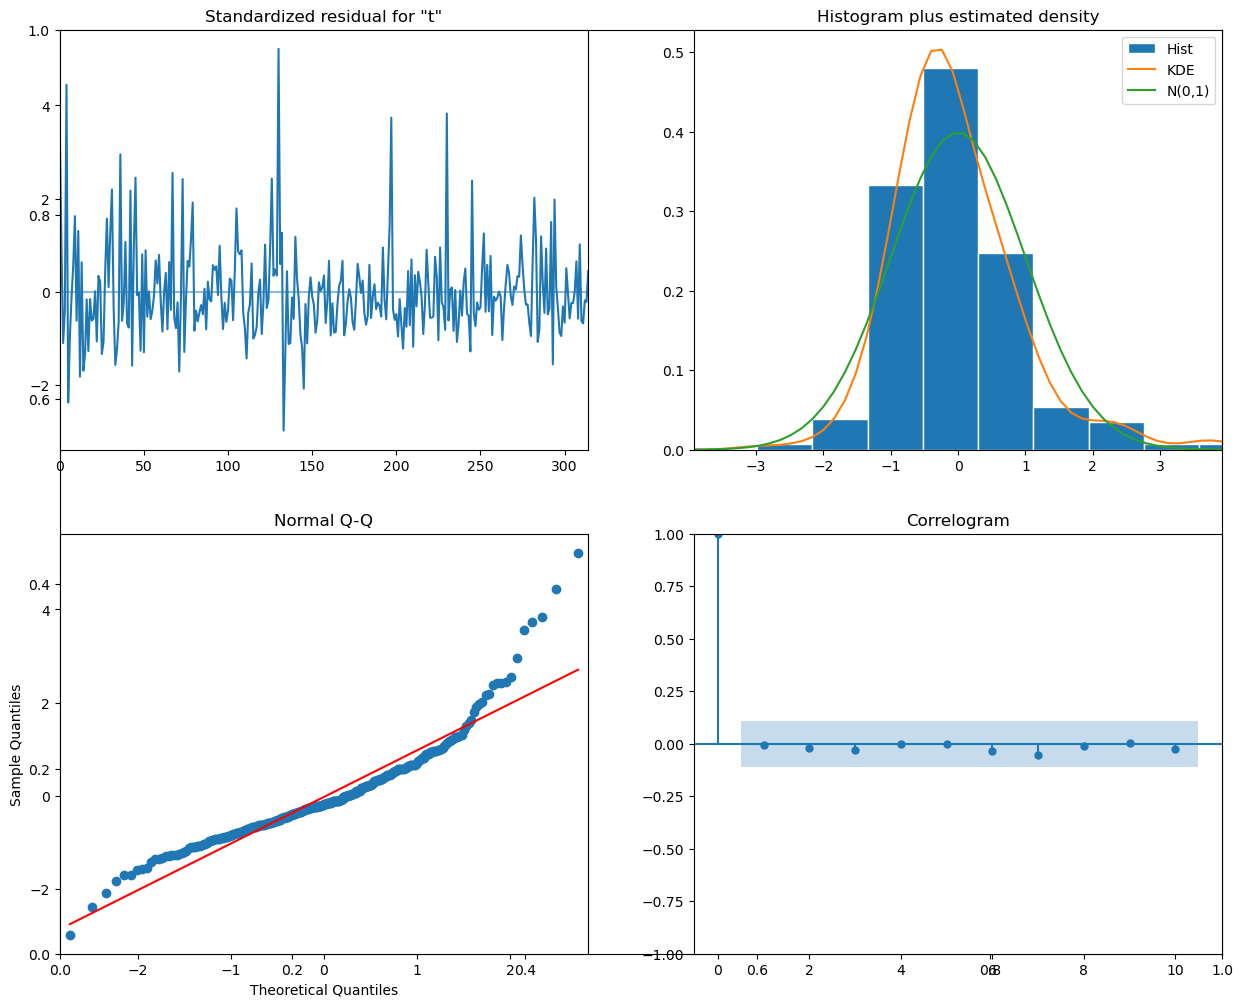

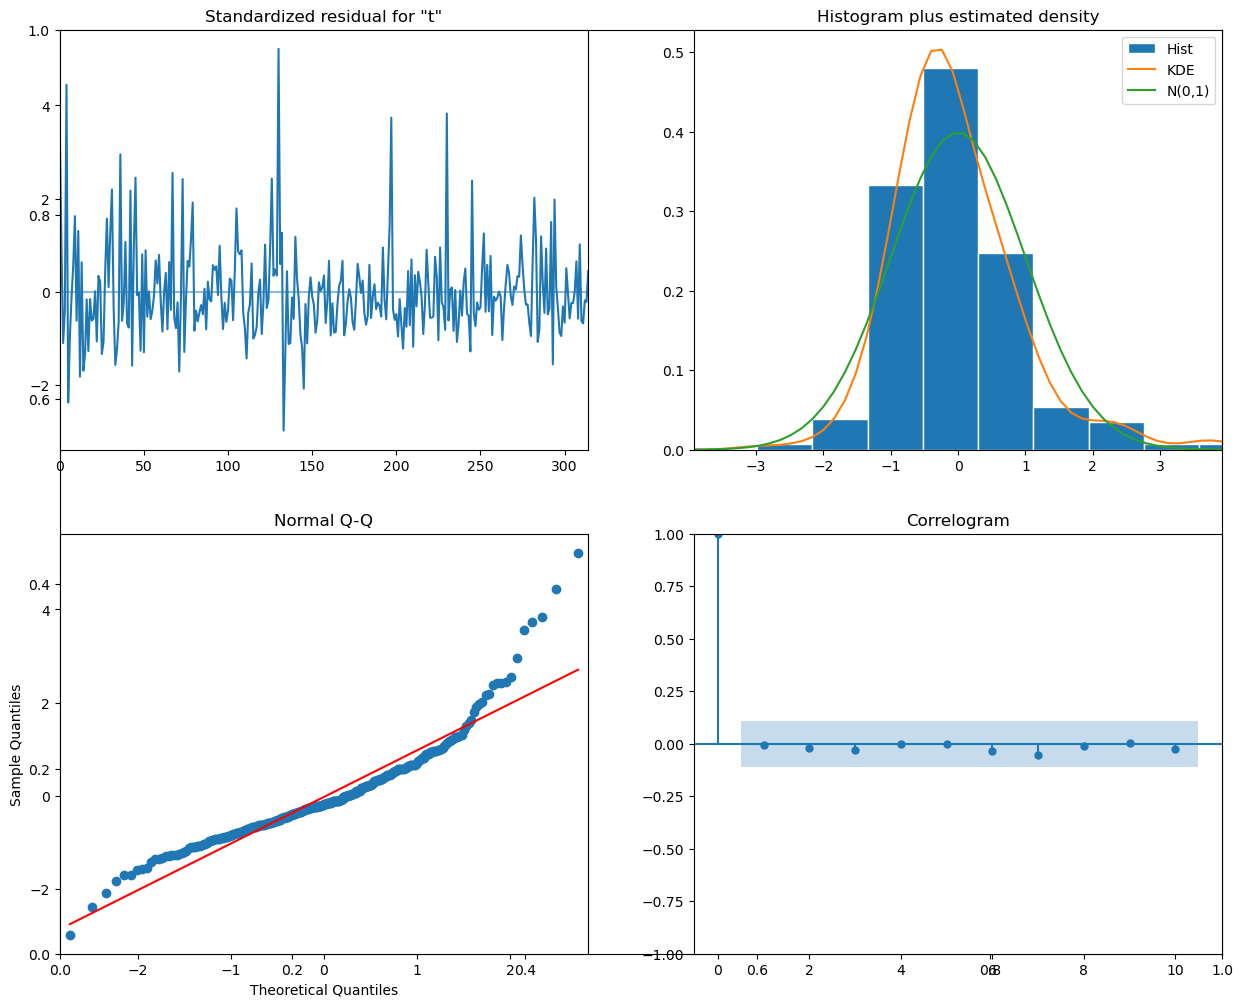

In [210]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [211]:
y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
    model = ARIMA(history, order=(16, 0, 1)).fit()
    next_pred = model.forecast()
    next_period = test.index[i]
    pred_data = pd.Series(next_pred.iloc[0], index=[next_period])
    y_pred_wfv = pd.concat([y_pred_wfv, pred_data])
    tested_data = pd.Series([test[next_period]], index=[next_period])
    history = pd.concat([history, tested_data])

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_11244\1459070297.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: Co

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

In [212]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df_pred_test = pd.DataFrame({'y_test': test, 'y_pred_wfv': y_pred_wfv})
fig = px.line(df_pred_test, labels={'value': 'Total Visits'})
fig.show()

In [213]:
df_pred_test

,y_test,y_pred_wfv
2017-06-28,30.0,50.651426
2017-06-29,65.0,63.345850
2017-06-30,89.0,34.724874
2017-07-02,25.0,47.368291
2017-07-03,11.0,46.521222
2017-07-04,29.0,55.479227
2017-07-05,153.0,53.011904
2017-07-06,124.0,58.655109
2017-07-07,93.0,71.873119
2017-07-08,41.0,74.804796
